In [15]:
import ssl

from   cesium import datasets
from   cesium.featurize import featurize_time_series as fts
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.model_selection import train_test_split
import xgboost as xgb

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
eeg = datasets.fetch_andrzejak()
type(eeg)

Loaded data from cached archive.


dict

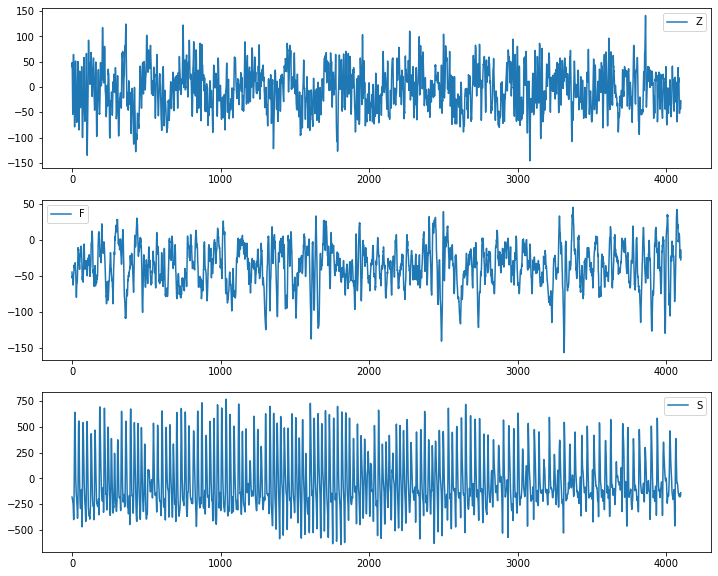

In [3]:
plt.figure(figsize=[12, 10])
plt.subplot(311)
plt.plot(eeg['measurements'][0])
plt.legend(eeg['classes'][0])

plt.subplot(312)
plt.plot(eeg['measurements'][300])
plt.legend(eeg['classes'][300])

plt.subplot(313)
plt.plot(eeg['measurements'][450])
plt.legend(eeg['classes'][450]);

In [4]:
use = [
    'amplitude', 'percent_beyond_1_std', 'percent_close_to_median',
    'skew', 'max_slope']
fset_cesium = fts(
    times=eeg['times'],
    values=eeg['measurements'],
    errors=None,
    features_to_use=use,
    scheduler=None)

In [5]:
fset_cesium.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,skew,max_slope
channel,0,0,0,0,0
0,143.5,0.327313,0.505004,0.032805,11107.796610
1,211.5,0.290212,0.640469,-0.092715,20653.559322
2,165.0,0.302660,0.515987,-0.004100,13537.627119
3,171.5,0.300952,0.541128,0.063678,17008.813559
4,170.0,0.305101,0.566268,0.142753,13016.949153


In [6]:
np.std(eeg['measurements'][0])

40.41100040099819

In [7]:
np.mean(eeg['measurements'][0])

-4.1320478398828415

In [8]:
sample_ts = eeg['measurements'][0]
sz = len(sample_ts)
ll = -4.13 - 40.41
ul = -4.13 + 40.41
quals = [
    i for i in range(sz) if sample_ts[i] < ll or sample_ts[i] > ul]
len(quals) / sz

0.3273126678057115

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    fset_cesium.values, eeg['classes'], random_state=21)

In [12]:
forest = RandomForestClassifier(
    n_estimators=10, max_depth=3, random_state=21)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.616

In [16]:
xgboost = xgb.XGBClassifier(
    n_estimators=10, max_depth=3, random_state=21)
xgboost.fit(X_train, y_train)
xgboost.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1355: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or not (self.classes_ == expected_classes).all()


AttributeError: 'bool' object has no attribute 'all'